In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files
uploaded = files.upload()

Saving HW_Data_Set.xlsx to HW_Data_Set (1).xlsx


In [5]:
import io
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
df=df.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [6]:
import numpy as np
df=df.replace('?',np.nan)
df = df.dropna()

In [9]:
y=df["90_target"]
X=df.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')

X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2.0,15.0,13.0,1.0,56.0,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3.0,30.752568,-5.0,-22.0,-22.0,-21.0,-23.0,-36.0,-40.0,...,1.200346,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0.0,11.0,11.0,1.0,63.0,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3.0,36.812130,-6.0,-18.0,-24.0,-24.0,-25.0,-38.0,-43.0,...,1.200129,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5.0,15.0,9.0,-1.0,65.0,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3.0,39.648290,-4.0,-11.0,-21.0,-22.0,-24.0,-36.0,-42.0,...,1.199911,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11.0,18.0,8.0,0.0,68.0,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3.0,40.902782,-5.0,-10.0,-21.0,-23.0,-26.0,-37.0,-44.0,...,1.199694,-0.000013,-1.522935,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13.0,23.0,10.0,10.0,91.0,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2.0,48.462194,-18.0,-26.0,-37.0,-40.0,-43.0,-53.0,-61.0,...,1.199477,-0.000013,-1.520349,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 6166
Columns: 132 entries, ind_5 to ind_428
dtypes: float64(132)
memory usage: 5.2 MB


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

# SVR

In [125]:

svr_model = SVR("linear").fit(X_train, y_train)


In [126]:
svr_model.predict(X_train)[0:5]

array([ 11.52989207, -22.84494915,  18.94098991, -27.36096555,
        21.46294045])

In [127]:
y_train[0:5]

5329    36.160668
4217   -36.806235
714     37.684820
5731   -35.708156
5061    35.458229
Name: 90_target, dtype: float64

In [128]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

37.443409906122206

In [129]:
y_pred = svr_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

35.21493700328338

## Model Tuning

In [ ]:
svr_params = {"C": np.arange(1,5,1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
str(svr_cv_model.best_params_)

In [ ]:
svr_model = SVR("linear", C=0.1).fit(X_train, y_train)

In [ ]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

37.443409906122206

# Naive Bayes

In [12]:
import io
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
dfnb=df.copy()
dfnb.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


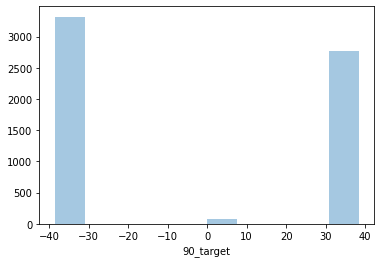

In [13]:
import seaborn as sns
sns.distplot(dfnb["90_target"],kde=False)

In [14]:
dfnb["90_target"][100]

37.01957905

In [15]:
for i in range(len(dfnb["90_target"])):
  if dfnb["90_target"][i]>=-40 and dfnb["90_target"][i]<=-30:
    dfnb["90_target"][i]=0
  if dfnb["90_target"][i]>-10 and dfnb["90_target"][i]<10:
    dfnb["90_target"][i]=1
  if dfnb["90_target"][i]>30 and dfnb["90_target"][i]<40:
    dfnb["90_target"][i]=2
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
import numpy as np
dfnb=dfnb.replace('?',np.nan)
dfnb = dfnb.dropna()

In [17]:
y=dfnb["90_target"]
X_=dfnb.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2.0,15.0,13.0,1.0,56.0,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3.0,30.752568,-5.0,-22.0,-22.0,-21.0,-23.0,-36.0,-40.0,...,1.200346,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0.0,11.0,11.0,1.0,63.0,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3.0,36.812130,-6.0,-18.0,-24.0,-24.0,-25.0,-38.0,-43.0,...,1.200129,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5.0,15.0,9.0,-1.0,65.0,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3.0,39.648290,-4.0,-11.0,-21.0,-22.0,-24.0,-36.0,-42.0,...,1.199911,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11.0,18.0,8.0,0.0,68.0,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3.0,40.902782,-5.0,-10.0,-21.0,-23.0,-26.0,-37.0,-44.0,...,1.199694,-0.000013,-1.522935,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13.0,23.0,10.0,10.0,91.0,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2.0,48.462194,-18.0,-26.0,-37.0,-40.0,-43.0,-53.0,-61.0,...,1.199477,-0.000013,-1.520349,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522


In [18]:
X_trainNB,X_testNB,y_trainNB,y_testNB=train_test_split(X,y,test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_trainNB)
X_train_scaled = scaler.transform(X_trainNB)
X_test_scaled = scaler.transform(X_testNB)

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
nb = MultinomialNB()
nb_model = nb.fit(X_train_scaled, y_trainNB)
nb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred = nb_model.predict(X_test_scaled)
accuracy_score(y_testNB, y_pred)

0.5889235569422777

In [23]:
y_pred = nb_model.predict(X_train_scaled)
accuracy_score(y_trainNB, y_pred)

0.5972944849115505

# Gradient Boosting Machines

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

24.805329251200742

## Model Tuning

In [38]:
gbm_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 8]
 }

In [39]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [40]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8}

In [41]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,  
                                      max_depth = 8)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [42]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

14.832047729201628

In [43]:
y_pred = gbm_tuned.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.9748468424606203

In [44]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

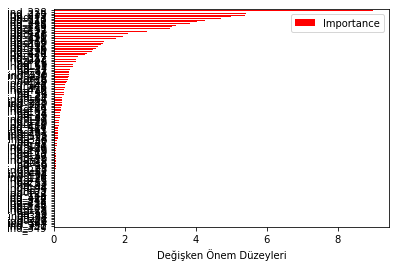

In [47]:
import matplotlib.pyplot as plt
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [51]:
knn_model.n_neighbors

5

In [52]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

27.517771605527976

In [53]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  13.51511997525359
k = 3 için RMSE değeri:  17.254904221084033
k = 4 için RMSE değeri:  19.99267145959896
k = 5 için RMSE değeri:  21.54128374996204
k = 6 için RMSE değeri:  22.86496993147191
k = 7 için RMSE değeri:  23.939374449305355
k = 8 için RMSE değeri:  25.029812513040145
k = 9 için RMSE değeri:  25.906740470110506
k = 10 için RMSE değeri:  26.591824411675375


## Model Tuning

In [58]:
knn_params = {'n_neighbors': np.arange(1,10,1)}

In [59]:
knn = KNeighborsRegressor()

In [60]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [61]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
knn_cv_model.best_params_["n_neighbors"]

2

In [63]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  28.016986643457802
k = 2 için RMSE değeri:  13.51511997525359 RMSE_CV değeri:  26.633409871739197
k = 3 için RMSE değeri:  17.254904221084033 RMSE_CV değeri:  27.23621444834389
k = 4 için RMSE değeri:  19.99267145959896 RMSE_CV değeri:  27.3914076263531
k = 5 için RMSE değeri:  21.54128374996204 RMSE_CV değeri:  27.86505215469714
k = 6 için RMSE değeri:  22.86496993147191 RMSE_CV değeri:  28.550626370922714
k = 7 için RMSE değeri:  23.939374449305355 RMSE_CV değeri:  29.219244955855412
k = 8 için RMSE değeri:  25.029812513040145 RMSE_CV değeri:  29.621653581511918
k = 9 için RMSE değeri:  25.906740470110506 RMSE_CV değeri:  29.977755742903696
k = 10 için RMSE değeri:  26.591824411675375 RMSE_CV değeri:  30.29438781769275


In [64]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [65]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

26.66611299566255